In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

I will also look at the separations of the mass combinations of the WD+WD systems that merge within a hubble time

I will also look at the total mass distirbutions of all WD+WD and see what separations would make different combinations to merge

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/mnt/home/msantiago/ceph/data/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


In [3]:
# reading in the HDF5 file
pathTorates_NS = '/mnt/home/msantiago/ceph/data/Rate_info_NSNS_v02.46.01.h5' #path of the hdf5 file

Data_rates_NS = h5.File(pathTorates_NS)

In [4]:
list(Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info_NS = Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [5]:
rates_info_NS.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [6]:
display(rates_info_NS['SEED'])
display(rates_info_NS['DCOmask'])
print(sum(rates_info_NS['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info_NS['merger_rate']) #80 redshift bins 
display(rates_info_NS['redshifts'])
print(rates_info_NS['redshifts'][()])

<HDF5 dataset "SEED": shape (3433,), type "<u8">

<HDF5 dataset "DCOmask": shape (46675,), type "|b1">

3433


<HDF5 dataset "merger_rate": shape (3433, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [7]:
dco_mask_NS = rates_info_NS['DCOmask'][()]

#### Doing rates analysis on the AIS WD hdf5 output

In [8]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_WD_LG_AIS_3.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [9]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [10]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [11]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [12]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_NEW_LG_3.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [13]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

In [14]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

Now we need to do things with WD+WD and NS simultaneously 

In [15]:
# gathering the seeds from the rates.h5 file - this is for the WD+WD
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]
merging_all_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,0,1,NaN,NaN,29,0.517110,11,11,1536.080151,7.360919
464,2,2.408900,0.0,0,"b""b'3 '""","b""b'3 '""",0.408430,0.179267,1,0.015102,0,1,NaN,NaN,49,0.162051,10,10,4019.363959,2.653913
465,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,0,1,NaN,NaN,86,0.074546,11,10,8874.314167,7.842265
466,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,0,1,NaN,NaN,87,1.677890,10,11,4428.913115,10.000000
467,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,0,1,NaN,NaN,97,0.852472,10,11,1390.603090,9.999991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
18784,2,133.331258,0.0,0,"b""b'3 '""","b""b'3 '""",0.367379,0.192023,1,0.021299,0,1,NaN,NaN,999807,0.432549,10,10,12968.246071,1.153200
18785,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
18786,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [17]:
merging_all_NS = DCO_WD_data[dco_mask_NS]

ValueError: Item wrong length 46675 instead of 18788.

In [16]:
print(np.shape(rates_info['merger_rate'][:,0]))

(18325,)


In [17]:
# print(np.shape(rates_info['merger_rate'][0,:]))
# rates_info['merger_rate'][0,:]

In [18]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
# merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

In [19]:
rates_info['merger_rate'][0,:].shape[0]

80

In [20]:
len(rates_info['merger_rate'][:,3])

18325

In [21]:
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_2866550/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_2866550/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_2866550/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [24]:
# for BNS
rates_NS = rates_info_NS['merger_rate']

for i in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]

NameError: name 'merging_all_NS' is not defined

#### Selecting only the COWD

In [22]:
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(merging_all_WD)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))
merging_all_COWD = merging_all_WD[carbon_oxygen_bool]

In [23]:
merging_all_COWD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18782,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18783,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18785,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18786,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# let's make sure there are the at leats one COWD in the dataframe
star_co = np.logical_or(merging_all_COWD['Stellar_Type(1)']==11,merging_all_COWD['Stellar_Type(2)']==11)
sum(star_co)

17028

In [25]:
# let's slice where there are systems with WD above Chandrasekhar limit
chandra_bool_m1m2 = np.logical_and(merging_all_COWD['Mass(1)']<1.44,merging_all_COWD['Mass(2)']<1.44)
merging_all_COWD_sub_chandra = merging_all_COWD[chandra_bool_m1m2]
merging_all_COWD_sub_chandra

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18782,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18783,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18785,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18786,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
merging_all_COWD_sub_chandra[merging_all_WD.columns[21]]

463       0.038523
465      31.308374
466       0.000000
467      52.868070
468       1.632615
           ...    
18782     0.000008
18783     1.844864
18785     0.000977
18786     0.301644
18787     0.518492
Name: merger_rate_z1, Length: 17028, dtype: float64

In [27]:
merging_all_COWD[merging_all_COWD.columns[20]]

463       0.027982
465      19.121876
466       0.651558
467      46.509461
468       1.036660
           ...    
18782     0.000006
18783     1.600408
18785     0.000677
18786     0.248047
18787     0.434934
Name: merger_rate_z0, Length: 17028, dtype: float64

In [28]:
# seeing what the different types of syntax do
print(np.mean(merging_all_COWD[merging_all_COWD.columns[20]]))
print(merging_all_COWD.columns[20])
print(len(merging_all_COWD[merging_all_COWD.columns[20]]))
print(len(merging_all_COWD.columns[20]))

3.4101130812142633
merger_rate_z0
17028
14


#### let's get where M_tot > 1.4 solar masses


In [29]:
# let's get where M_tot > 1.4 solar masses
tot_chandra_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.4
merging_all_COWD_chan = merging_all_COWD[tot_chandra_bool]
merging_all_COWD_chan

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
471,2,746.914029,0.0,0,"b""b'6 '""","b""b'3-8 '""",1.266761,0.683914,1,0.001246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,2,6556.509232,0.0,0,"b""b'6 '""","b""b'3 '""",1.346163,0.439681,1,0.029978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18781,2,1567.477929,0.0,0,"b""b'6 '""","b""b'4-8 '""",1.330292,0.663417,1,0.000111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18782,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18785,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18786,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have the rates let's plot the redshift vs the rates

Let's take the mean value of every redshift rate value

In [30]:
range(rates_info['merger_rate'][0,:].shape[0])

range(0, 80)

In [31]:
# gettign the mean merger rate per system
mean_rate = []

# looping through each collection of merger rates
for j in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r = np.mean(merging_all_COWD[merging_all_COWD.columns[20+j]])
    mean_rate.append(mean_r)

In [32]:
# gettign the mean merger rate per system
mean_rate_chandra = []

# looping through each collection of merger rates
for j in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r_chandra = np.mean(merging_all_COWD_sub_chandra[merging_all_COWD_sub_chandra.columns[20+j]])
    mean_rate_chandra.append(mean_r_chandra)

In [33]:
# gettign the mean merger rate per system
mean_rate_NS = []

# looping through each collection of merger rates
for j in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r_NS = np.mean(merging_all_NS[merging_all_NS.columns[20+j]])
    mean_rate_NS.append(mean_r_NS)

NameError: name 'merging_all_NS' is not defined

In [34]:
# redshifts = rates_info['redshifts']

# print(redshifts.shape)
# print(np.shape(mean_rate))
# redshifts[()]

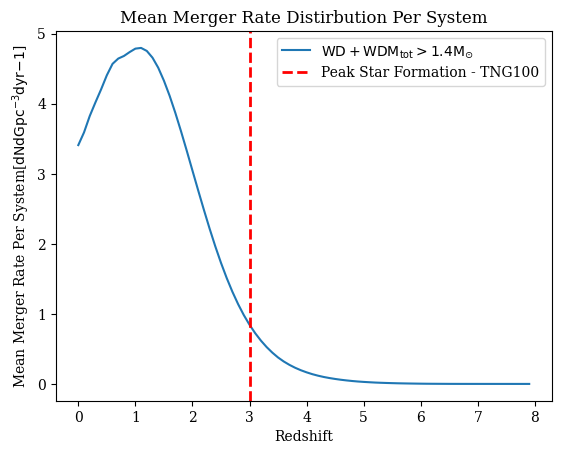

In [35]:
## let's plot the merger rates over redshift
redshifts = rates_info['redshifts']
plt.plot(redshifts[()],mean_rate_chandra,label=r'$\mathrm{WD+WD M_{tot} > 1.4 M_{\odot}}$')

# let's get the maximum of the mean merger rate and at which redshift this occurred
max_mean_rate = max(mean_rate)

# let's add a line to add important events that have happened
## peak of star formation? - TNG100 perscription
plt.axvline(3, color='r', linestyle='--', linewidth=2,label='Peak Star Formation - TNG100')
# plt.text(2.4, 2.2, "Peak of General Star Formation", fontsize=9)
# plt.arrow(2.7,2.4,-0.5,0.3,head_width=0.05,head_starts_at_zero=False)

## plotting the max mean rate
# plt.text(-0.3,4,'Max Mean Rate = ',fontsize=8)
# plt.text(-0.3,3.7,round(max_mean_rate,4),fontsize=8)
# plt.text(0.2,3.7,r'[$dNdGpc^{-3}dyr{-1}$]',fontsize=8)

## labels
plt.ylabel(r"Mean Merger Rate Per System[$\mathrm{dNdGpc^{-3}dyr{-1}}$]")
plt.xlabel(r"Redshift")
plt.title(r"Mean Merger Rate Distirbution Per System")
plt.legend()


ValueError: x and y must have same first dimension, but have shapes (80,) and (0,)

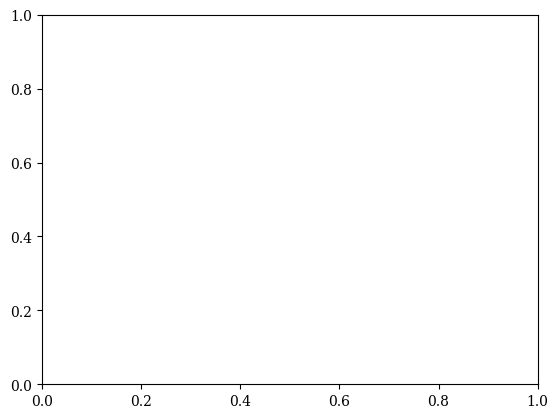

In [36]:
## let's plot the merger rates over redshift
redshifts_NS = rates_info_NS['redshifts']
plt.plot(redshifts_NS[()],mean_rate_NS,label='NS+NS')


# let's add a line to add important events that have happened
## peak of star formation? - TNG100 perscription
plt.axvline(3, color='r', linestyle='--', linewidth=2,label='Peak Star Formation - TNG100')


## labels
plt.ylabel(r"Mean Merger Rate Per System[$\mathrm{dNdGpc^{-3}dyr{-1}}$]")
plt.xlabel(r"Redshift")
plt.title(r"Mean Merger Rate Distirbution Per System")
plt.legend()


Getting the total merger rate for a specific redshift

In [37]:
# gettign the mean merger rate per system
total_merger_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(merging_all_COWD[merging_all_COWD.columns[20+s]])
    total_merger_rate.append(tota_rate)

In [38]:
# BNS
# gettign the mean merger rate per system
total_merger_rate_NS = []

# looping through each collection of merger rates
for s in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_NS = np.sum(merging_all_NS[merging_all_NS.columns[20+s]])
    total_merger_rate_NS.append(tota_rate_NS)

NameError: name 'merging_all_NS' is not defined

In [39]:
# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra = np.sum(merging_all_COWD_chan[merging_all_COWD_chan.columns[20+s]])
    chandra_merger_rate.append(tota_rate_chandra)

In [41]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


In [42]:
converted_rates_briel

array([ 23849.90785839,  25398.60317387,  25398.60317387,  25088.86411078,
        21991.47347982,  49558.25009536,  23540.1687953 ,  33451.81881437,
        22301.21254291,  17964.86565957,  28805.73286793,  27876.51567864,
        12699.30158694,  31283.6453727 ,  17964.86565957,  32522.60162508,
        35310.25319294,  32832.34068818,  25398.60317387,  30664.1672465 ,
        39336.86101319,  30664.1672465 ,  32522.60162508,  41505.03445486,
        23540.1687953 ,  27876.51567864,  32522.60162508,  47080.33759059,
        43363.46883344,  37788.16569771,  72169.20170137,  28805.73286793,
        43363.46883344,  47080.33759059, 116461.8877241 ,  43363.46883344,
        62257.5516823 ,  44292.68602273,  71239.98451208,  46151.1204013 ,
        61328.33449301,  52345.90166322,  75886.07045852, 117391.10491338,
        70310.76732279,  51416.68447394,  40575.81726558,  68762.07200731,
        69381.5501335 ,  71239.98451208,  66903.63762874,  63806.24699778,
       119249.53929196,  

In [43]:
print(len(redshifts_briel))
print(len(rates_briel))
print(len(lower_limits))
print(len(upper_limits))

60
60
60
60


(1000, 1000000)

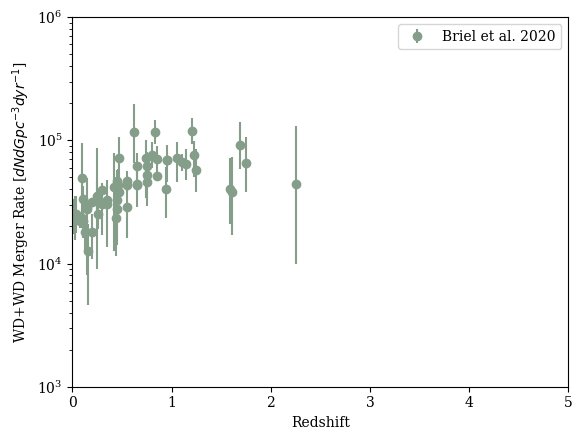

In [44]:
## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

In [45]:
## checking around z = 1.5 to see what I am doing differently to produce different error than Briel

np.where(np.array(redshifts_briel)==1.59)[0]
print("rates at z=1.59:",rates_briel[55])

print("un-converted lower uncertainty limit at z=1.59:",lower_limits[55])
print("lower uncertainty limit at z=1.59:",converted_lower_limits[55])

print("un-converted higher uncertainty limit at z=1.59:",upper_limits[55])
print("higher uncertainty limit at z=1.59:",converted_upper_limits[55])
# print("the y_err at z=1.59:",converted_y_error[55])

rates at z=1.59: 1.31
un-converted lower uncertainty limit at z=1.59: -0.64
lower uncertainty limit at z=1.59: -19823.300038144
un-converted higher uncertainty limit at z=1.59: 0.99
higher uncertainty limit at z=1.59: 30664.167246503996


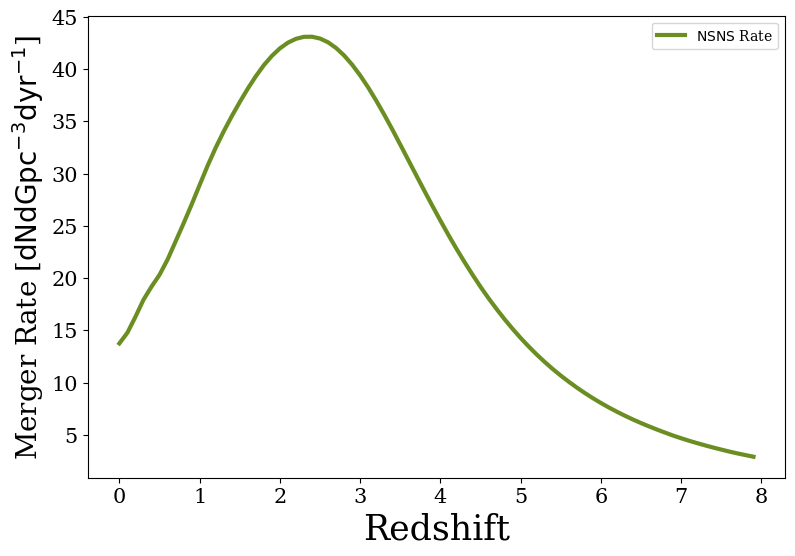

In [46]:
# let's lest plot the different COMPAS version of the rates vs. redshifts
plt.figure(figsize=(9,6))

total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=3,color='olivedrab',label=r'$\mathrm{NSNS}$ Rate')

plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

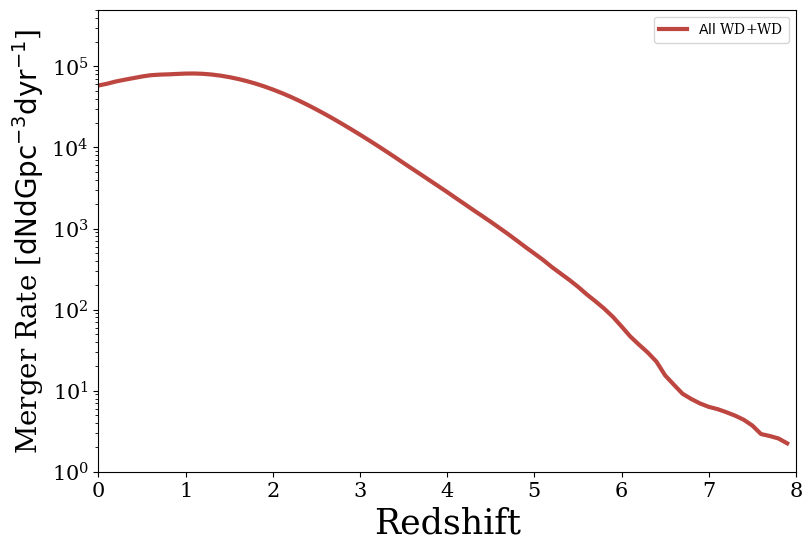

In [47]:

plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate,linewidth=3,color='#BD4640',label=r'$\mathrm{All}$ WD+WD') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

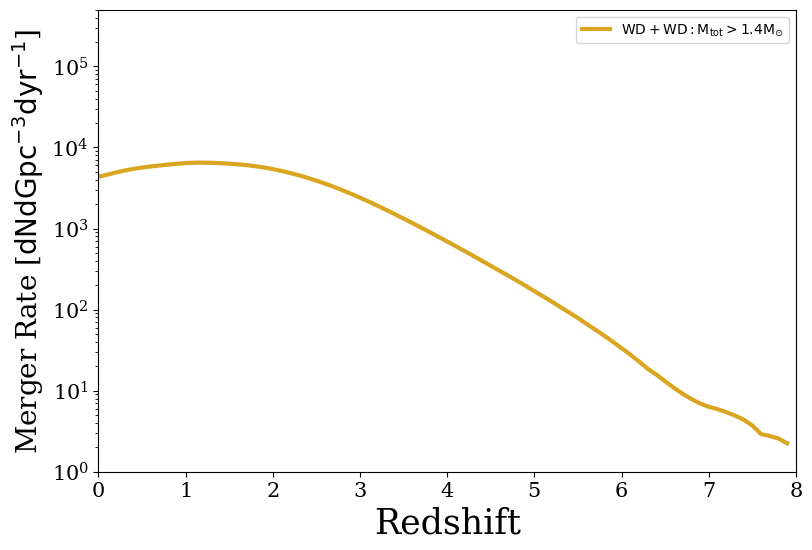

In [48]:
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],chandra_merger_rate,linewidth=3,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

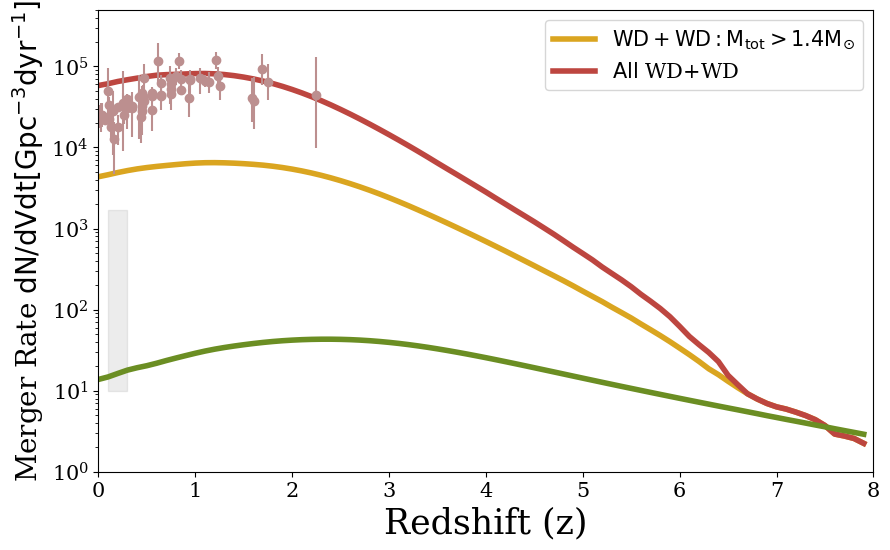

In [49]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],total_merger_rate,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


Let's make a version of the plot above but for a presentation

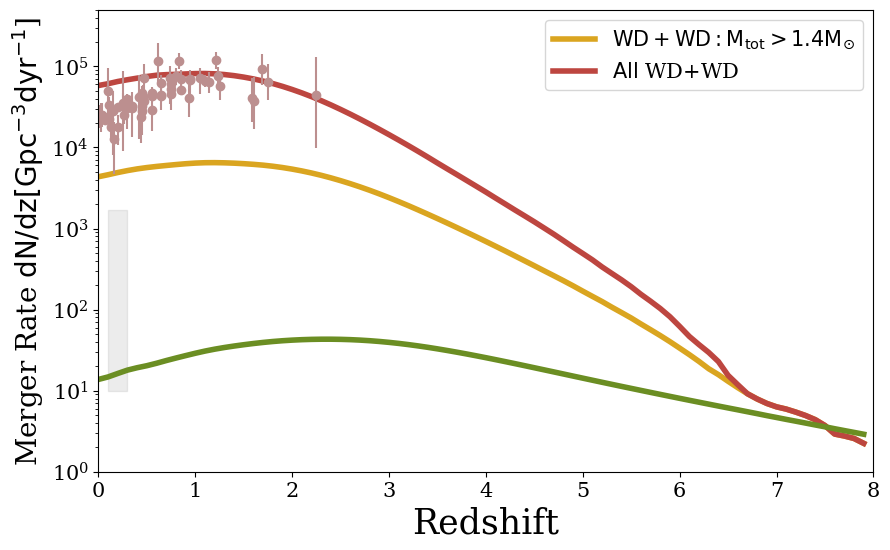

In [50]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
# ## COMPAS model
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],total_merger_rate,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

# ## Briel et al. 2020
plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender')#,label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

# ## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate $\mathrm{dN/dz[Gpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


#### Let's now add the rate lines for different slices of total masses! Let's do Mtot > 1.3, 1.2, 1.1, 1.0,

In [62]:
# selecting different slices for M_tot
# mtot>1.3
tot_mass_13_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.3 # making the bool
merging_all_COWD_mass_13 = merging_all_COWD[tot_mass_13_bool] # using the bool to slice the data

# mtot>1.2
tot_mass_12_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.2
merging_all_COWD_mass_12 = merging_all_COWD[tot_mass_12_bool]

# mtot>1.1
tot_mass_11_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.1
merging_all_COWD_mass_11 = merging_all_COWD[tot_mass_11_bool]

# mtot>1.0
tot_mass_10_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.0
merging_all_COWD_mass_10 = merging_all_COWD[tot_mass_10_bool]

In [60]:
# let's get where M_tot > certain masses via loops
mass_cuts = np.array([1.3,1.2,1.1,1.0])
labels = [13,12,11,10]
for mass in mass_cuts:
    for label in labels:
        tot_mass_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > mass # making the bool
        merging_all_COWD_mass+str(label) = merging_all_COWD[tot_mass_bool] # selecting for th especific mass regime

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (20998926.py, line 7)

In [63]:
# finding the merger rate for each mass slice 

# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_13 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_13 = np.sum(merging_all_COWD_mass_13[merging_all_COWD_mass_13.columns[20+s]])
    chandra_merger_rate_13.append(tota_rate_chandra_13)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_12 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_12 = np.sum(merging_all_COWD_mass_12[merging_all_COWD_mass_12.columns[20+s]])
    chandra_merger_rate_12.append(tota_rate_chandra_12)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_11 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_11 = np.sum(merging_all_COWD_mass_11[merging_all_COWD_mass_11.columns[20+s]])
    chandra_merger_rate_11.append(tota_rate_chandra_11)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_10 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_10 = np.sum(merging_all_COWD_mass_10[merging_all_COWD_mass_10.columns[20+s]])
    chandra_merger_rate_10.append(tota_rate_chandra_10)

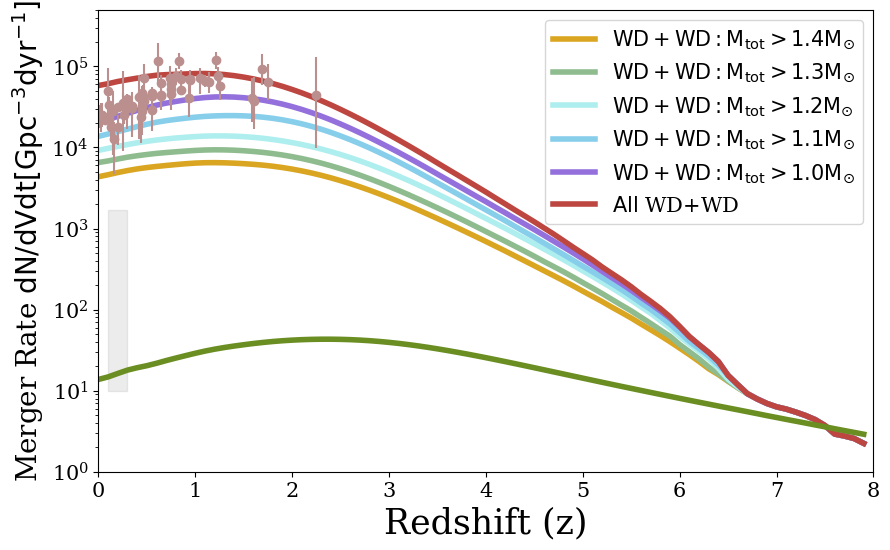

In [68]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_13,linewidth=4,color='darkseagreen',label=r'$\mathrm{WD+WD: M_{tot} > 1.3 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_12,linewidth=4,color='paleturquoise',label=r'$\mathrm{WD+WD: M_{tot} > 1.2 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_11,linewidth=4,color='skyblue',label=r'$\mathrm{WD+WD: M_{tot} > 1.1 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_10,linewidth=4,color='mediumpurple',label=r'$\mathrm{WD+WD: M_{tot} > 1.0 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


In [73]:
# selecting different slices for M_tot less than the mass regiime
# mtot>1.3
tot_mass_less_13_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.3 # making the bool
merging_all_COWD_mass_less_13 = merging_all_COWD[tot_mass_less_13_bool] # using the bool to slice the data

# mtot>1.2
tot_mass_less_12_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.2
merging_all_COWD_mass_less_12 = merging_all_COWD[tot_mass_less_12_bool]

# mtot>1.1
tot_mass_less_11_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.1
merging_all_COWD_mass_less_11 = merging_all_COWD[tot_mass_less_11_bool]

# mtot>1.0
tot_mass_less_10_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.0
merging_all_COWD_mass_less_10 = merging_all_COWD[tot_mass_less_10_bool]

In [92]:
# finding the merger rate for each mass slice 

# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_13 = []

# looping through each collection of merger rates
for a in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_13 = np.sum(merging_all_COWD_mass_less_13[merging_all_COWD_mass_less_13.columns[20+a]])
    chandra_merger_rate_less_13.append(tota_rate_chandra_less_13)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_12 = []

# looping through each collection of merger rates
for b in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_12 = np.sum(merging_all_COWD_mass_less_12[merging_all_COWD_mass_less_12.columns[20+b]])
    chandra_merger_rate_less_12.append(tota_rate_chandra_less_12)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_11 = []

# looping through each collection of merger rates
for c in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_11 = np.sum(merging_all_COWD_mass_less_11[merging_all_COWD_mass_less_11.columns[20+c]])
    chandra_merger_rate_less_11.append(tota_rate_chandra_less_11)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_10 = []

# looping through each collection of merger rates
for d in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_10 = np.sum(merging_all_COWD_mass_less_10[merging_all_COWD_mass_less_10.columns[20+d]])
    chandra_merger_rate_less_10.append(tota_rate_chandra_less_10)

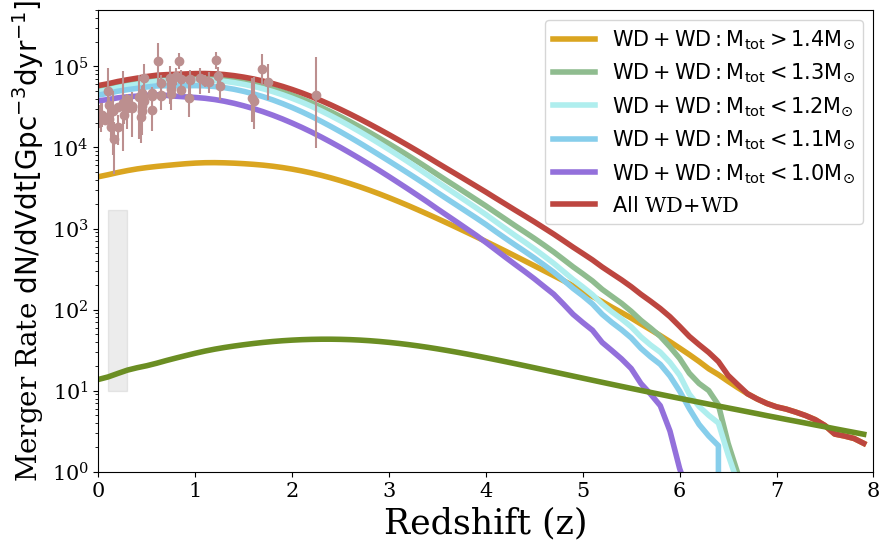

In [93]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_13,linewidth=4,color='darkseagreen',label=r'$\mathrm{WD+WD: M_{tot} < 1.3 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_12,linewidth=4,color='paleturquoise',label=r'$\mathrm{WD+WD: M_{tot} < 1.2 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_11,linewidth=4,color='skyblue',label=r'$\mathrm{WD+WD: M_{tot} < 1.1 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_10,linewidth=4,color='mediumpurple',label=r'$\mathrm{WD+WD: M_{tot} < 1.0 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


#### Rates Calculation

In [28]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(merging_all_WD['Time']*1e6) # converting from Myr to yr
t_col_lg = np.array(merging_all_WD['Coalescence_Time']*1e6)

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(merging_all_WD.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)

In [29]:
print(len(t_delay_lg))
print(len(merging_all_WD[merging_all_WD.columns[20]]))

9570
9570


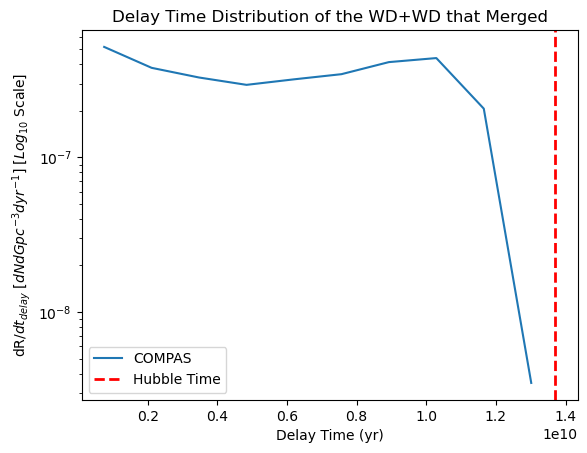

In [32]:
# let's make a histogram of the delay times of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(t_delay_lg, weights=merging_all_WD[merging_all_WD.columns[20]])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='COMPAS')
# plt.step(center_bins,hist/bin_width,where='mid')

# the age of the universe
age_universe = (13.7e9) # yr

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.annotate('Hubble Time',xy=(1.37e10,10**-5.7),xytext=(1.28e10,10**-5.5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')

plt.xlabel("Delay Time (yr)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dt_{delay}$ [$dNdGpc^{-3}dyr^{-1}$] [$Log_{10}$ Scale]")
plt.title("Delay Time Distribution of the WD+WD that Merged")
plt.legend()


In [33]:
# take these systems + check tthe immediate RLOF flag
# going into RLOF afte the CE was sucessfully ejected because stars are so close together
# however this CE ejection may no have actually been sucessful and could have MT and merged before ejection
# check if these systems are also stellar merges
rlof_ce_bool = merging_all_WD['Immediate_RLOF>CE']==True
sum(rlof_ce_bool)

0

In [34]:
# if these are true then CE on the hertzbrung gab (star would be increasing too rapidly)
ce_bool = merging_all_WD['Optimistic_CE']==True
sum(ce_bool)

0

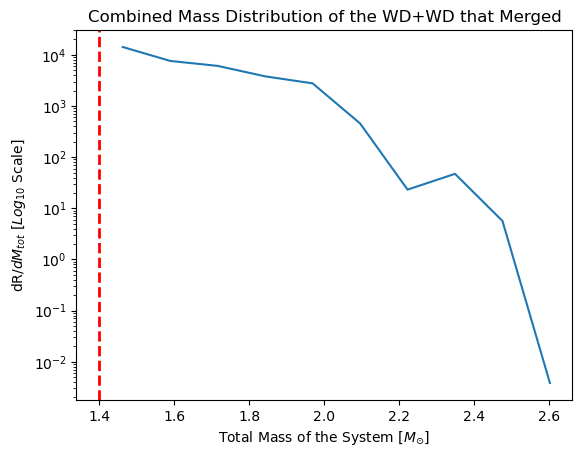

In [36]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)']+merging_all_WD['Mass(2)'], weights=merging_all_WD[merging_all_WD.columns[20]])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Total Mass of the System [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dM_{tot}$ [$Log_{10}$ Scale]")
plt.title("Combined Mass Distribution of the WD+WD that Merged")

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2,label='Chandrasekhar Limit')
# plt.annotate('Chandrasekhar Limit',xy=(1.35,10**3),xytext=(1.1,10**3),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')


Text(1.2, 100000, 'Chandrasekhar Limit')

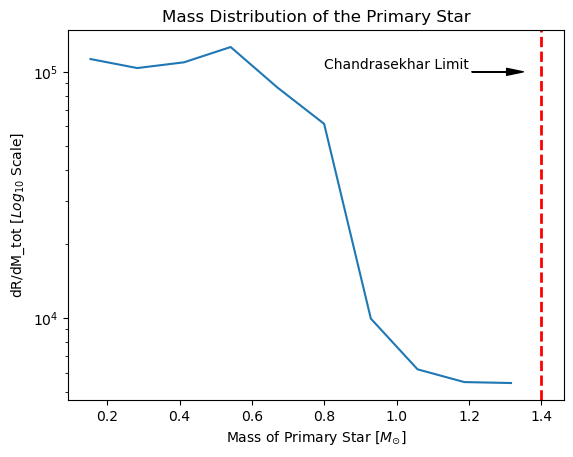

In [67]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Mass of Primary Star [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/dM_tot [$Log_{10}$ Scale]")
plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2)
plt.annotate('Chandrasekhar Limit',xy=(1.35,10**5),xytext=(1.2,10**5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')



Text(1.2, 100000, 'Chandrasekhar Limit')

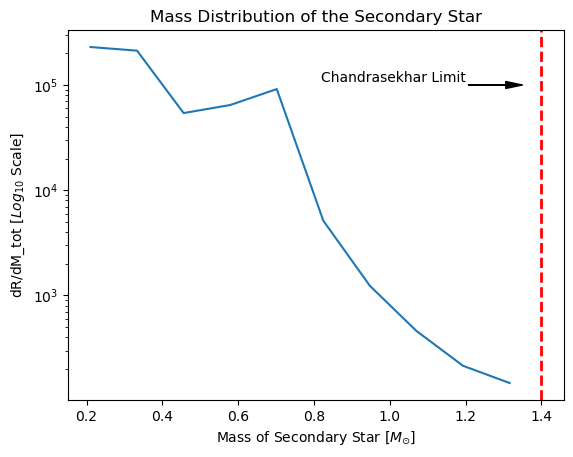

In [68]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(2)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Mass of Secondary Star [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/dM_tot [$Log_{10}$ Scale]")
plt.title("Mass Distribution of the Secondary Star")\

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2)
plt.annotate('Chandrasekhar Limit',xy=(1.35,10**5),xytext=(1.2,10**5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')



Text(0.5, 1.0, 'Separation Distribution')

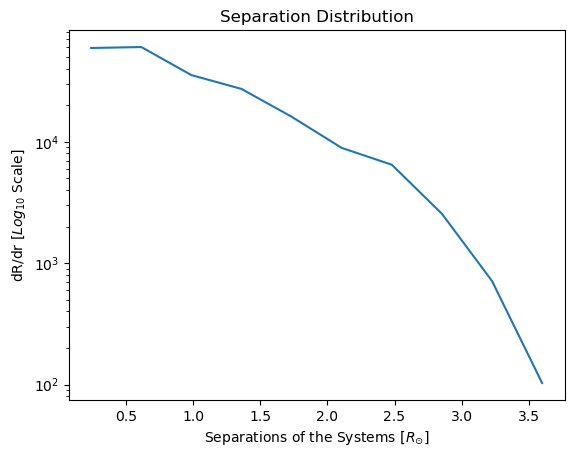

In [69]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['SemiMajorAxis@DCO'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Separations of the Systems [$R_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e5)
plt.ylabel(r"dR/dr [$Log_{10}$ Scale] []")
plt.title("Separation Distribution")

Let's look at the stellar types and if there are any places where there are oxygen/neon white dwarfs

In [51]:
ONeWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==12,merging_all_WD['Stellar_Type(2)']==12)
sum(ONeWD_bool)

193

It seems liek there are no systems that merged within a hubble time that are oxygen neon white dwarfs

In [79]:
OtherWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==10,merging_all_WD['Stellar_Type(2)']==11)
sum(OtherWD_bool)

801

Text(0, 0.5, 'Stellar Type of Secondary Star')

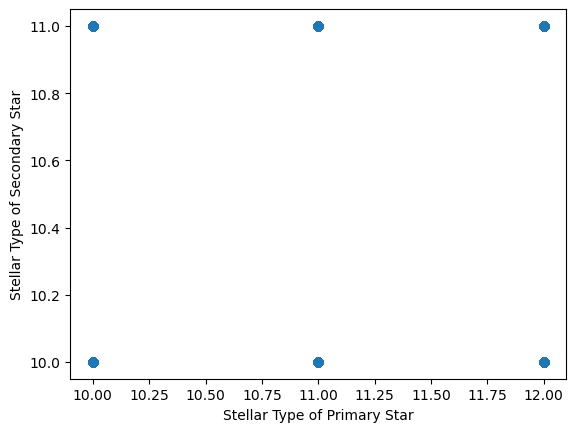

In [72]:
plt.scatter(merging_all_WD['Stellar_Type(1)'],merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

#### Let's look at different mass combinations of the WD+WD

In [53]:
# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [54]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(SP_WD_data['SEED'],dco_seed_mask)

SP_merging_all_WD = SP_WD_data[overlap_seeds_bool]

In [55]:
SP_merging_all_WD

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
14,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,405.370186,0,1.0,1.578707
31,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,494.155681,0,1.0,0.309698
40,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,4992.556501,0,1.0,9.999993
52,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,11,1,1,0.0,3276.834166,0,1.0,9.371884
114,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,7039.419315,0,1.0,9.999954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99883,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,12,10,1,1,0.0,1591.331097,0,1.0,0.623121
99900,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,2223.960578,0,1.0,0.203871
99917,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,11,10,1,1,0.0,1245.184712,0,1.0,0.559022
99943,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1121.480719,0,1.0,1.292016


Let's add the rates info to this table as well

In [56]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_2818718/2194420057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [57]:
pd.set_option('display.max_columns', None)
display(SP_merging_all_WD)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
14,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5-8 ',0.571620,0.673707,3.759247,2.496308,0,0,0.021682,0.021682,0.0,0.0,0,1,14,0.921893,0.773165,4.141153,5.469058,-1.391145,-0.640291,0.936227,6.016802,2.232218,0.081812,265.0,265.0,30.0,30.0,11,11,1,1,0.0,405.370186,0,1.0,1.578707,199.992277
31,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5-8 ',0.773915,0.674927,5.321437,2.535452,0,0,0.004714,0.004714,0.0,0.0,0,1,31,0.028992,0.958106,2.025278,4.840019,1.341119,-0.315357,4.061598,0.860275,1.621585,0.172910,265.0,265.0,30.0,30.0,11,11,1,1,0.0,494.155681,0,1.0,0.309698,4.572180
40,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.128751,0.345038,1.056363,0.836216,0,0,0.001365,0.001365,0.0,0.0,0,1,40,0.644008,0.055366,0.704790,4.954511,-0.439392,0.173293,0.911352,1.909537,0.307706,0.014454,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4992.556501,0,1.0,9.999993,25.987896
52,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'6 ',0.312582,0.549920,1.342096,1.211404,0,0,0.000292,0.000292,0.0,0.0,0,1,52,0.823374,0.026118,0.918938,1.324311,0.239116,0.273836,5.201502,3.896400,0.692827,0.181955,265.0,265.0,30.0,30.0,10,11,1,1,0.0,3276.834166,0,1.0,9.371884,0.169227
114,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.155492,0.353392,1.009260,0.782078,0,0,0.000230,0.000230,0.0,0.0,0,1,114,0.126419,0.868745,4.975159,5.817499,-0.023176,-1.376458,0.185541,2.273397,0.480138,0.019013,265.0,265.0,30.0,30.0,10,10,1,1,0.0,7039.419315,0,1.0,9.999954,0.584733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99883,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3 ',1.328178,0.293608,6.224975,1.567545,0,0,0.001031,0.001031,0.0,0.0,0,1,99883,0.655379,0.897873,4.170324,5.282087,-0.654811,0.367726,3.527144,1.630363,1.593854,4.274133,265.0,265.0,30.0,30.0,12,10,1,1,0.0,1591.331097,0,1.0,0.623121,0.478006
99900,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.587863,0.313331,2.532480,2.087098,0,0,0.023187,0.023187,0.0,0.0,0,1,99900,0.950791,0.821404,0.237795,5.655914,-0.318792,-0.379973,0.011547,0.841951,0.788408,2.025903,265.0,265.0,30.0,30.0,11,11,1,1,0.0,2223.960578,0,1.0,0.203871,12.540324
99917,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.672699,0.305973,2.849890,1.913630,0,0,0.011928,0.011928,0.0,0.0,0,1,99917,0.944094,0.569482,3.964786,5.709037,0.340193,0.037240,4.560689,2.963702,1.077492,2.259127,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1245.184712,0,1.0,0.559022,26.565725
99943,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.593881,0.608892,3.809298,1.819042,0,0,0.001694,0.001694,0.0,0.0,0,1,99943,0.405853,0.553875,2.861591,3.610101,-1.182174,-0.791088,2.468744,5.308245,2.429508,0.149992,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1121.480719,0,1.0,1.292016,0.008876


In [58]:
# filter for things that are flagged as being stellar mergers and also have RLOF_after_CE flag true
# this is like before where the core of a red giant is within the commom envelope and merges with another WD and then produces a merged within the CE not after the CE is sucessfully ejected
merger_bool = SP_merging_all_WD['Merger']==True
sum(merger_bool)

0

In [59]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_weights['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


Let's separate these systems between HeWD and COWD

Text(0, 0.5, 'Stellar Type of Secondary Star')

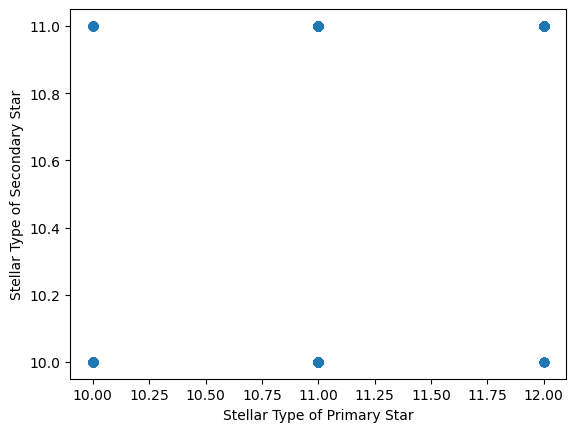

In [60]:
plt.scatter(SP_merging_all_WD['Stellar_Type(1)'],SP_merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

Let's select for stellar types that are just HeWD+HeWD and COWD+COWD

In [78]:
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = WD_BINARY_BOOLS(SP_merging_all_WD)

hewd_bool = np.logical_or(HeONeWD_bool,np.logical_or(HeWD_bool,HeCOWD_bool))
HeWD_SYS = SP_merging_all_WD[hewd_bool]

cowd_bool = np.logical_or(COONeWD_bool,np.logical_or(COWD_bool,COHeWD_bool))
COWD_SYS = SP_merging_all_WD[cowd_bool]

one_bool = np.logical_or(ONeCOWD_bool,np.logical_or(ONeWD_bool,ONeHeWD_bool))
ONe_SYS = SP_merging_all_WD[one_bool]

#checking if these bools take care of all of the systems
print(sum(hewd_bool)+sum(cowd_bool)+sum(one_bool))

2053


In [79]:
pd.set_option('display.max_columns', None)
display(HeWD_SYS)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
40,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.128751,0.345038,1.056363,0.836216,0,0,0.001365,0.001365,0.0,0.0,0,1,40,0.644008,0.055366,0.704790,4.954511,-0.439392,0.173293,0.911352,1.909537,0.307706,0.014454,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4992.556501,0,1.0,9.999993,25.987896
52,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'6 ',0.312582,0.549920,1.342096,1.211404,0,0,0.000292,0.000292,0.0,0.0,0,1,52,0.823374,0.026118,0.918938,1.324311,0.239116,0.273836,5.201502,3.896400,0.692827,0.181955,265.0,265.0,30.0,30.0,10,11,1,1,0.0,3276.834166,0,1.0,9.371884,0.169227
114,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.155492,0.353392,1.009260,0.782078,0,0,0.000230,0.000230,0.0,0.0,0,1,114,0.126419,0.868745,4.975159,5.817499,-0.023176,-1.376458,0.185541,2.273397,0.480138,0.019013,265.0,265.0,30.0,30.0,10,10,1,1,0.0,7039.419315,0,1.0,9.999954,0.584733
178,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'3 ',0.230328,0.257566,1.488246,0.729937,0,0,0.000392,0.000392,0.0,0.0,0,1,178,0.149413,0.038360,1.508881,4.697390,0.480975,0.806062,3.275655,6.018173,0.065053,0.024454,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13558.528672,0,1.0,9.997296,0.000000
246,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.095871,0.347288,1.143918,0.646951,0,0,0.012881,0.012881,0.0,0.0,0,1,246,0.730396,0.912466,4.623174,4.338023,0.179728,1.022154,5.762142,2.579558,0.579987,0.014761,265.0,265.0,30.0,30.0,10,10,1,0,0.0,10127.255517,0,1.0,9.999930,987.799073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89237,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'3 ',0.410484,0.171899,1.755313,1.288348,0,0,0.017690,0.017690,0.0,0.0,0,1,89237,0.157873,0.915686,1.787861,3.179386,0.957684,-0.849706,5.401349,2.540013,0.149156,0.859139,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4548.122007,0,1.0,1.562613,119.984753
91146,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'3 ',0.407103,0.217973,1.374260,1.058547,0,0,0.010623,0.010623,0.0,0.0,0,1,91146,0.519986,0.323116,4.150877,5.507330,-0.285479,-0.670843,1.578794,0.215150,0.627862,0.810146,265.0,265.0,30.0,30.0,10,10,1,1,0.0,8320.900426,0,1.0,1.466733,184.954899
93584,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'3 ',0.401303,0.214189,1.432840,1.148556,0,0,0.012640,0.012640,0.0,0.0,0,1,93584,0.398198,0.380827,6.018518,6.032628,-0.743285,0.983292,4.967473,0.554279,0.478274,0.773993,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6513.393909,0,1.0,1.538097,141.639234
95753,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'3 ',0.317871,0.154917,1.280724,0.930398,0,0,0.012842,0.012842,0.0,0.0,0,1,95753,0.137951,0.319419,3.764020,5.534012,-1.146053,0.544394,0.602854,0.538835,0.141814,0.309571,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13591.803477,0,1.0,3.175412,0.000000


In [80]:
COWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
14,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5-8 ',0.571620,0.673707,3.759247,2.496308,0,0,0.021682,0.021682,0.0,0.0,0,1,14,0.921893,0.773165,4.141153,5.469058,-1.391145,-0.640291,0.936227,6.016802,2.232218,0.081812,265.0,265.0,30.0,30.0,11,11,1,1,0.0,405.370186,0,1.0,1.578707,199.992277
31,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5-8 ',0.773915,0.674927,5.321437,2.535452,0,0,0.004714,0.004714,0.0,0.0,0,1,31,0.028992,0.958106,2.025278,4.840019,1.341119,-0.315357,4.061598,0.860275,1.621585,0.172910,265.0,265.0,30.0,30.0,11,11,1,1,0.0,494.155681,0,1.0,0.309698,4.572180
145,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5-8 ',0.313526,0.633586,2.268165,1.659666,0,0,0.000523,0.000523,0.0,0.0,0,1,145,0.144498,0.002030,0.557504,3.333726,-0.995954,1.008821,2.638364,4.842696,0.595433,0.041022,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1693.163818,0,1.0,9.453099,0.689483
201,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'3 ',0.761031,0.476833,5.276068,2.518839,0,0,0.005898,0.005898,0.0,0.0,0,1,201,0.529538,0.747881,5.278759,3.839399,0.667957,0.769642,1.454062,0.879877,0.832280,0.082856,265.0,265.0,30.0,30.0,11,11,1,1,0.0,560.412039,0,1.0,0.585781,10.196120
276,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.614742,0.233758,2.567864,1.980611,0,0,0.013445,0.013445,0.0,0.0,0,1,276,0.305995,0.977249,2.228907,1.424633,-1.347562,0.032530,0.651488,5.493705,0.226873,0.837957,265.0,265.0,30.0,30.0,11,11,1,1,0.0,7079.066352,0,1.0,0.716414,73.318052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99806,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.824230,0.444042,3.599740,2.918356,0,0,0.015304,0.015304,0.0,0.0,0,1,99806,0.360957,0.848722,4.043030,1.729268,-0.255120,0.433388,0.096174,1.322018,1.489781,2.460208,265.0,265.0,30.0,30.0,11,11,1,1,0.0,647.946291,0,1.0,0.220255,12.196621
99900,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.587863,0.313331,2.532480,2.087098,0,0,0.023187,0.023187,0.0,0.0,0,1,99900,0.950791,0.821404,0.237795,5.655914,-0.318792,-0.379973,0.011547,0.841951,0.788408,2.025903,265.0,265.0,30.0,30.0,11,11,1,1,0.0,2223.960578,0,1.0,0.203871,12.540324
99917,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.672699,0.305973,2.849890,1.913630,0,0,0.011928,0.011928,0.0,0.0,0,1,99917,0.944094,0.569482,3.964786,5.709037,0.340193,0.037240,4.560689,2.963702,1.077492,2.259127,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1245.184712,0,1.0,0.559022,26.565725
99943,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.593881,0.608892,3.809298,1.819042,0,0,0.001694,0.001694,0.0,0.0,0,1,99943,0.405853,0.553875,2.861591,3.610101,-1.182174,-0.791088,2.468744,5.308245,2.429508,0.149992,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1121.480719,0,1.0,1.292016,0.008876


In [81]:
ONe_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
1151,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3 ',1.260864,0.447918,5.642453,2.912864,0,0,0.000487,0.000487,0.0,0.0,0,1,1151,0.882877,0.459431,5.481853,4.481044,-0.303596,-0.395469,4.230492,5.082451,0.927786,4.587432,265.0,265.0,30.0,30.0,12,11,1,1,0.0,540.488563,0,1.0,0.163140,0.006995
4023,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3-8 ',1.261375,0.660931,6.829793,4.704296,0,0,0.012747,0.012747,0.0,0.0,0,1,4023,0.259185,0.276121,1.312807,1.362763,0.350497,1.080645,1.799340,5.344515,2.416424,6.499389,265.0,265.0,30.0,30.0,12,11,1,1,0.0,159.654452,0,1.0,0.272718,15.516367
10503,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5-8 ',1.353486,0.673578,6.202058,3.863458,0,0,0.000992,0.000992,0.0,0.0,0,1,10503,0.151200,0.686219,2.072477,2.784151,-0.651541,-0.244878,0.569028,2.683764,3.469434,9.157752,265.0,265.0,30.0,30.0,12,11,1,1,0.0,181.384600,0,1.0,0.218794,2.563788
10611,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3-8 ',1.306620,0.636037,6.854950,4.105882,0,0,0.008476,0.008476,0.0,0.0,0,1,10611,0.814462,0.796226,3.672249,3.450684,0.564115,0.288388,5.400100,5.919318,1.135152,8.212555,265.0,265.0,30.0,30.0,12,11,1,1,0.0,225.762187,0,1.0,0.253627,6.804542
10964,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3-8 ',1.309149,0.310635,6.634947,3.149132,0,0,0.005069,0.005069,0.0,0.0,0,1,10964,0.912589,0.660314,2.588332,1.410975,-0.079814,0.487410,3.888003,0.669637,0.973604,4.730338,265.0,265.0,30.0,30.0,12,11,1,1,0.0,477.182640,0,1.0,0.175726,2.436775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98375,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5-8 ',1.257049,0.621112,5.687777,2.514546,0,0,0.000957,0.000957,0.0,0.0,0,1,98375,0.337586,0.708707,1.330165,2.248514,0.770815,1.081993,3.017376,3.053211,1.600100,5.859539,265.0,265.0,30.0,30.0,12,11,1,1,0.0,519.635221,0,1.0,0.127429,0.049064
98399,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5 ',1.291475,0.702011,5.830504,2.298487,0,0,0.000890,0.000890,0.0,0.0,0,1,98399,0.908563,0.968407,0.577753,2.825132,-1.059312,-0.168063,2.511597,4.176479,3.528368,7.263156,265.0,265.0,30.0,30.0,12,11,1,1,0.0,655.713889,0,1.0,0.158066,0.000000
98412,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'4-8 ',1.369871,0.725958,6.058485,4.390945,0,0,0.000255,0.000255,0.0,0.0,0,1,98412,0.512529,0.898272,4.695214,4.375970,0.077231,0.472592,2.545780,2.906919,2.764492,8.223169,265.0,265.0,30.0,30.0,12,11,1,1,0.0,130.641467,0,1.0,0.245839,0.003839
98664,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3-8 ',1.274920,0.660665,7.270519,5.190239,0,0,0.027281,0.027281,0.0,0.0,0,1,98664,0.193469,0.484074,4.819938,4.599265,-0.805383,0.191137,3.113356,4.536761,3.221733,7.236711,265.0,265.0,30.0,30.0,12,11,1,1,0.0,126.304881,0,1.0,0.328410,44.384106


Let's look at a histogram of the masses for each setllar binary type

In [32]:
pratice_list = np.linspace(0,10,10)
print(pratice_list[1:])
print(pratice_list[:-1])

[ 1.11111111  2.22222222  3.33333333  4.44444444  5.55555556  6.66666667
  7.77777778  8.88888889 10.        ]
[0.         1.11111111 2.22222222 3.33333333 4.44444444 5.55555556
 6.66666667 7.77777778 8.88888889]


In [94]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)'], weights=HeWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary HeWD")

In [95]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)']+HeWD_SYS['Mass(2)'], weights=HeWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Total Mass of the System (M_sol)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM_tot (natural log)")
# plt.title("Total Mass Spectrum of the Primary HeWD")

For HeWD, let's separate the mass bins into masses below 0.32 M_sun and above 0.32 Msun

In [96]:
# HeWD_SYS_LOWM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']<0.32]
# HeWD_SYS_HIGHM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']>0.32]

In [97]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(COWD_SYS['Mass(1)'], weights=COWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary COWD")

For COWD, let's separate the mass bins for below 0.8 M_sun and above 0.8 M_sun

In [98]:
# COWD_SYS_LOWM = COWD_SYS.loc[COWD_SYS['Mass(1)']<0.8]
# COWD_SYS_HIGHM = COWD_SYS.loc[COWD_SYS['Mass(1)']>0.8]

In [99]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(ONe_SYS['Mass(1)'], weights=ONe_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary ONeWD")

#### Within these bins let's look at what secondary mass is most common

In [100]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS_LOWM['Mass(2)'], weights=HeWD_SYS_LOWM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary HeWD (within M1<0.32)")

In [101]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS_HIGHM['Mass(2)'], weights=HeWD_SYS_HIGHM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary HeWD (within M1>0.32)")

In [102]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_SYS_LOWM['Mass(2)'], weights=COWD_SYS_LOWM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary COWD (within M1<0.80)")

In [103]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_SYS_HIGHM['Mass(2)'], weights=COWD_SYS_HIGHM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary COWD (within M1>0.80)")

So the results seem like likely couples:

HeWD:
- Mass(1)<0.32 + Mass(2) ~ 0.2 or Mass(2) ~ 0.17
- Mass(1)>0.32 + Mass(2) ~ 0.19

COWD:
- Mass(1)<0.8 + Mass(2) ~ 0.20
- Mass(1)>0.8 + Mass(2) ~ 0.232

Let's slice the data even more to look at the separations that would be needed for these stars to lead to a GW merger

This will allow us to see what mass combinations produce systems that have a coalescence time less than Hubble time

In [104]:
# # selecting the common secondary mass ranges for the HeWDs
# HeWD_LOWM_SEP = HeWD_SYS_LOWM.loc[np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.16,HeWD_SYS_LOWM['Mass(2)']<=0.179)]
# HeWD_HIGHM_SEP = HeWD_SYS_HIGHM.loc[np.logical_and(HeWD_SYS_HIGHM['Mass(2)']>=0.16,HeWD_SYS_HIGHM['Mass(2)']<=0.19)]

# # selecting the common secondary mass ranges for the COWDs
# COWD_LOWM_SEP = COWD_SYS_LOWM.loc[np.logical_and(COWD_SYS_LOWM['Mass(2)']>=0.18,COWD_SYS_LOWM['Mass(2)']<=0.24)]
# COWD_HIGHM_SEP = COWD_SYS_HIGHM.loc[np.logical_and(COWD_SYS_HIGHM['Mass(2)']>=0.230,COWD_SYS_HIGHM['Mass(2)']<=0.26)]



In [105]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_LOWM_SEP['SemiMajorAxis'], weights=HeWD_LOWM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)")

In [106]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_HIGHM_SEP['SemiMajorAxis'], weights=HeWD_HIGHM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)")

In [107]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_LOWM_SEP['SemiMajorAxis'], weights=COWD_LOWM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)")

In [108]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_HIGHM_SEP['SemiMajorAxis'], weights=COWD_HIGHM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)")

#### Let's use the peak of these separations distirbutions to find what the coalescence times of the different cases are

In [109]:
"""
This function will give the maximum separation needed for a bianry to merge within a hubble time given the massesand lifetime of the system
"""
def separations(e,Mmoremass,Mlessmass,t_life):

    """
    e = eccentricity
    t_hubble = age of the universe
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    age_universe = (13.7e9*u.yr).to(u.s)

    if t_life > age_universe.value:
        return print("The age of your binary surpasses that of the age of the universe (ypur binary is still forming).")

    else:

        Mmoremass = (Mmoremass * u.Msun).to(u.kg)
        Mlessmass = (Mlessmass * u.Msun).to(u.kg)

        a_min_den = (1/(5*(const.c**5)))*((age_universe-((t_life*u.Myr).to(u.s)))*(256*(const.G**3)*Mmoremass*Mlessmass*(Mmoremass+Mlessmass)))
        a_min_num = ((1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2))**(1/4)
        a_min_final = ((a_min_den/a_min_num)**(1/4)).to(u.Rsun)


        return (a_min_final).value

In [117]:
# let's look at overall data of all of the WD+WD

In [116]:
# we need to get the lifetime of each case

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

# getting the life time of the binary 
# HeWD
min_m1_hewd = HeWD_SYS[HeWD_SYS['Mass(1)']==min(HeWD_SYS['Mass(1)'])]
min_m2_hewd = HeWD_SYS[HeWD_SYS['Mass(2)']==min(HeWD_SYS['Mass(2)'])]
max_m1_hewd = HeWD_SYS[HeWD_SYS['Mass(1)']==max(HeWD_SYS['Mass(1)'])]
max_m2_hewd = HeWD_SYS[HeWD_SYS['Mass(2)']==max(HeWD_SYS['Mass(2)'])]

lifetime_lowm1_he = np.mean(HeWD_SYS['Time'])
# lifetime_lowm2_he = np.mean(HeWD_SYS['Time'])



# lifetime_highm2_he = np.mean(HeWD_HIGHM_SEP['Time'])
# lifetime_lowm2_co = np.mean(COWD_LOWM_SEP['Time'])
# lifetime_highm2_co = np.mean(COWD_HIGHM_SEP['Time'])

# # getting the delay time
# delay_lowm2_he = t_col_lowm2_he + lifetime_lowm2_he
# delay_highm2_he = t_col_highm2_he + lifetime_highm2_he
# delay_lowm2_co = t_col_lowm2_co + lifetime_lowm2_co
# delay_highm2_co = t_col_highm2_co + lifetime_highm2_co

# delay_times = [delay_lowm2_he,delay_highm2_he,delay_lowm2_co,delay_highm2_co]

In [59]:
# now let's see what systems merged within a hubble time

### low M1 HeWD
if delay_lowm2_he <= age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was",delay_lowm2_he,"Myr.")
elif delay_lowm2_he > age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 did NOT merge within a hubble time")

### high M1 HeWD
if delay_highm2_he <= age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was",delay_highm2_he,"Myr.")
elif delay_highm2_he > age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.49, M2 ~ 0.19 did NOT merge within a hubble time")

### low M1 COWD
if delay_lowm2_co <= age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was",delay_lowm2_co,"Myr.")
elif delay_lowm2_co > age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 did NOT merge within a hubble time")

### high M1 COWD
if delay_highm2_co <= age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was",delay_highm2_co,"Myr.")
elif delay_highm2_co > age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 did NOT merge within a hubble time")

The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was 7038.335382419957 Myr.
The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was 7931.913136985516 Myr.
The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was 5536.289107960877 Myr.
The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was 2329.641225956191 Myr.


In [ ]:
# take into account the avrgae lifetime of one of the WD to ten subtract the hubble time from the lifetime and make sure this is less than 1e4 (less than a total delay time of 14 Gyr)
# take a short and long lifetime and compare the results (allow us to see different paraemeters of the pairs that produce caloescence times less than a hubble time)

#### Let's look at all of the WDs not just those that merged within a hubble time

In [36]:
BWD_BOOL = np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==11)))))))))
WDWD_SP_SYS = SP_WD_data[BWD_BOOL]

In [37]:
WDWD_SP_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'5 ',0.174864,0.705756,1.700805,1.687579,0,0,0.022502,0.022502,0.0,0.0,0,1,3,0.070725,0.708148,5.277555,1.827808,0.021657,-0.126211,3.577089,5.631576,1.818213,0.037819,265.0,265.0,30.0,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
5,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.618584,0.594434,1.628424,1.473634,0,0,0.001643,0.001643,0.0,0.0,0,1,5,0.055180,0.870732,5.223387,1.298855,0.992183,-0.962037,6.154034,3.843700,10263.665097,18.592562,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14127.407871,0,1.0,0.375554
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.647687,0.557429,1.414923,0.937875,0,0,0.001093,0.001093,0.0,0.0,0,1,6,0.947476,0.331980,1.315739,5.159935,-1.159509,1.325468,2.325466,3.738822,3519.609779,8.372757,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14037.450094,0,1.0,8.699165
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'5 ',b'NA ',1.113402,1.107227,3.565856,3.437921,0,0,0.000138,0.000138,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,4344.926196,2.559086,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13828.031985,0,1.0,0.115519
10,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.151958,0.368583,1.043763,0.752876,0,0,0.000847,0.000847,0.0,0.0,0,1,10,0.298761,0.020752,3.107600,3.981329,0.520839,0.167425,5.227053,1.412439,1.962806,0.029289,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13727.752620,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.759623,0.708064,1.639487,1.406327,0,0,0.000319,0.000319,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,8070.434316,18.062579,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.906897,0.830446,4.103825,3.571561,0,0,0.025604,0.025604,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,25738.967556,26.885431,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.050281,1.099315,3.633960,2.973530,0,0,0.000209,0.000209,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,492165.870155,741.053113,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.381834,1.081376,5.585732,3.915191,0,0,0.000447,0.000447,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,120948.185496,164.104198,265.0,265.0,30.0,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


Let's now find the total mass distirbution of this system

In [39]:
# let's grab the merger rates to use as weights 
weight_rates = rates_info['merger_rate'][:,0]

In [40]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(WDWD_SP_SYS['Mass(1)']+WDWD_SP_SYS['Mass(2)'], weights=weight_rates)
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Total Mass of the System (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Total Mass Distribution of all WD+WD")

ValueError: weights should have the same shape as a.

Let's look at the radii distirbution of each star in the system that merged within a hubble time

In [42]:
# we want to read in the bse_RLOF to get information about thes different systems

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [43]:
RLOF_WD_data

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
0,4.913579e-02,1,0.0,0.0,6.981643,0.033150,1,1.278098,1.278098,0.401838,0.401838,0.192187,1,0.000452,0,1,0,0,1.104742,1.104742,1.002723,1.002723,0.359438,0.359438,0.551751,0.551751,1,0,2.289382,2.289382,1,1,0,0,8935.864569,4112.304505,1370.655907,1397.530986,-0.185971,-0.185971,-0.185971,-0.185971,-0.333333,-0.333333,-0.333333,-0.333333
1,1.000000e+00,1,0.0,0.0,0.000404,1728.379906,3,0.209222,0.209222,2.559538,0.803968,977.667108,1,0.000488,0,0,0,1,0.021023,0.021023,0.001142,1.107525,56.640986,0.277404,1.009954,7.940383,1,1,94.437943,0.070168,10,10,5,8,5648.591384,70734.443004,2269.744455,2269.769501,0.000000,0.028961,0.000000,0.000000,0.000000,1.125119,0.000000,0.000000
2,1.000000e+00,0,0.0,0.0,8.019393,24.187741,1,1.406292,0.994856,1.404112,1.815549,1.532523,0,0.000488,0,1,0,0,2.714505,2.797467,1.003459,1.000000,2.703152,1.129319,0.999971,0.306820,1,1,7.136562,8.523092,1,2,1,1,5813.403533,12057.797710,2017.582194,2019.581580,-0.188603,-0.189426,-0.188603,-0.189426,-0.005855,-0.333333,-0.005855,-0.333333
3,1.000000e+00,0,0.0,0.0,22.688239,80.615766,2,0.994856,0.209222,1.815549,2.601182,0.733149,0,0.000488,1,1,0,0,2.827175,0.021023,1.010620,0.001165,1.449952,1.328387,0.393932,0.023993,1,1,8.523092,93.038544,2,10,1,1,86972.091100,15021.739449,2019.581580,2022.876302,0.000000,-0.189426,0.000000,-0.189426,0.000000,-0.333333,0.000000,-0.333333
4,1.000000e+00,1,0.0,0.0,0.001672,3575.126180,4,0.174864,0.174864,3.173482,0.707540,3863.164299,0,0.022502,0,0,0,1,0.022514,0.022514,0.000618,0.046511,131.832261,0.340603,1.006931,0.373621,1,3,210.174660,1.814536,10,10,5,8,7787.332370,76555.407878,2132.934918,2132.948051,0.000000,0.498235,0.000000,0.000000,0.000000,3.302075,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477050,4.651337e-01,0,0.0,0.0,128.531110,1303.441312,1,4.889014,0.831891,4.084344,5.971449,234.802278,0,0.001052,0,1,0,0,20.892075,0.177191,1.006089,0.001682,2.530491,2.350590,0.132294,0.009204,1,999982,52.626880,463.221205,2,7,1,1,46217.761119,22644.458206,96.242169,96.267259,-0.223543,-0.223543,0.000000,-0.223543,-0.333333,-0.333333,0.000000,-0.333333
477051,3.479073e-10,0,0.0,0.0,0.083046,26.720628,3,0.830544,0.830544,1.896004,1.152892,5482.022222,0,0.001052,0,0,0,1,0.009961,0.009961,0.000820,0.001169,17.975289,0.006273,1.016257,0.000634,1,999982,39.150858,24.288769,11,11,8,11,31077.493281,165859.183634,138.240894,138.245123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
477052,1.463683e-22,1,0.0,0.0,0.230624,19074.947519,2,0.754377,0.754377,5.125473,1.603597,44600.019646,1,0.001506,0,0,0,1,0.010843,0.010843,0.000064,0.000179,407.959450,129.848669,1.013891,1.519811,1,999993,735.948625,191.807300,11,11,5,9,38453.527837,5959.017009,164.458735,164.462706,0.000000,0.000699,0.000000,0.000000,0.000000,1.188072,0.000000,0.000000
477053,3.606516e-01,0,0.0,0.0,90.513427,884.476829,1,4.542663,0.755688,3.894213,5.259992,285.888197,0,0.001506,0,1,0,0,32.935152,0.163743,1.104217,0.000992,2.645721,2.328128,0.095170,0.005898,1,999993,76.025766,719.330536,2,7,1,1,44042.777189,20651.219430,114.317565,114.348224,-0.237732,-0.237732,0.000000,-0.237732,-0.333333,-0.333333,0.000000,-0.333333


Let's use our dco mask to only select the systems of interest

In [44]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],dco_seed_mask)

RLOF_merging_all_WD = RLOF_WD_data[overlap_seeds_bool]

In [45]:
RLOF_merging_all_WD

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
16,1.634313e-15,1,0.0,0.0,0.000039,45.851578,2,0.593913,0.593913,1.428799,0.246345,7.797041,1,0.001883,0,0,0,1,0.012861,0.012861,0.002114,0.649758,9.185646,0.019708,1.012587,1.486316,1,13,19.873817,0.043346,11,11,3,10,4031.968380,107102.101895,2202.412041,2203.361047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,9.811193e-04,1,0.0,0.0,480.988495,9.943467,1,1.838911,0.594231,1.430485,1.430485,2949.221746,0,0.001883,0,1,0,0,106.088135,0.190473,1.014830,0.031350,1.307087,1.307087,0.014023,0.144212,1,13,260.796369,19.854150,5,8,1,1,62000.472379,8974.490868,1216.147733,1216.163328,0.002188,-0.245647,0.000000,-0.245647,1.217458,-0.333333,0.000000,-0.333333
250,3.507720e-04,1,0.0,0.0,24411.283772,11.140273,1,2.511939,0.804574,1.498617,1.498617,6809.243286,0,0.000173,0,1,0,0,117.289201,0.010258,1.004136,0.001767,1.008901,1.008901,0.010933,0.130851,1,282,275.293914,17.779232,5,11,1,1,4388.776049,10509.385464,463.890262,463.900129,0.000000,-0.151020,0.000000,-0.151020,0.000000,-0.333333,0.000000,-0.333333
251,8.593137e-15,1,0.0,0.0,0.000018,18.871625,2,0.804574,0.804574,1.497923,0.263241,6.805068,1,0.000173,0,0,0,1,0.010258,0.010258,0.001766,0.392443,7.789660,0.019183,1.010081,1.219107,1,282,17.784592,0.054719,11,11,3,10,3699.508098,86950.495368,1660.787339,1661.616350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
312,2.070067e-01,0,0.0,0.0,4.657736,2.628427,1,1.864380,0.806703,0.879989,1.098935,1.345641,0,0.000152,0,1,0,0,1.568998,1.916486,1.001463,1.722042,0.771022,0.907348,0.692900,0.707937,1,390,3.519612,3.157275,1,2,1,1,6131.523937,7723.506770,792.093602,800.993449,-0.143263,-0.148468,-0.143263,-0.148468,0.144229,-0.333333,0.144229,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475272,1.000000e+00,1,0.0,0.0,0.000037,20.992428,2,0.456693,0.456693,1.162072,0.237171,3.925401,1,0.000294,0,0,0,1,0.014929,0.014929,0.003782,0.783459,6.069751,0.020010,1.005194,1.415814,1,995736,13.085850,0.043641,10,10,3,10,3685.032509,87431.356995,3657.278586,3659.690788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
475558,1.915419e-04,1,0.0,0.0,82.785213,1.098140,1,1.374224,0.419092,0.922890,0.922890,1810.993544,0,0.002185,0,1,0,0,82.959725,0.015590,1.015472,0.007212,0.915382,0.915382,0.013438,0.295517,1,996451,197.426163,6.905298,3,10,1,1,139584.995046,6182.166707,2395.572853,2395.640674,0.000000,-0.250504,0.000000,-0.250504,0.000000,-0.333333,0.000000,-0.333333
475559,1.000000e+00,1,0.0,0.0,0.000014,35.098392,2,0.419092,0.419092,0.922073,0.177682,0.593818,1,0.002185,0,0,0,1,0.015590,0.015590,0.007206,1.107320,3.142713,0.022379,1.014137,2.349381,1,996451,6.909505,0.030964,10,10,3,10,2837.285931,94011.426177,9212.161556,9220.525957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
476518,4.194812e-04,1,0.0,0.0,127.636880,3.503435,1,1.500981,0.460240,1.185004,1.185004,2902.882053,0,0.005102,0,1,0,0,73.845056,0.014869,1.012298,0.002850,1.293294,1.293294,0.019750,0.161194,1,998703,182.579224,17.347713,3,10,1,1,159268.699246,6951.081603,2126.115194,2126.145581,0.000000,-0.272290,0.000000,-0.272290,0.000000,-0.333333,0.000000,-0.333333


Since some of the systems show up more than once since they experienced RLOF more than once, we need to select for just WD+WD for the final stellar type to egt the correct systems

In [47]:
BWD_BOOL = np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11)))))))))
WDWD_RLOF_SYS = RLOF_merging_all_WD[BWD_BOOL]

In [48]:
WDWD_RLOF_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
16,1.634313e-15,1,0.0,0.0,0.000039,45.851578,2,0.593913,0.593913,1.428799,0.246345,7.797041,1,0.001883,0,0,0,1,0.012861,0.012861,0.002114,0.649758,9.185646,0.019708,1.012587,1.486316,1,13,19.873817,0.043346,11,11,3,10,4031.968380,107102.101895,2202.412041,2203.361047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,8.593137e-15,1,0.0,0.0,0.000018,18.871625,2,0.804574,0.804574,1.497923,0.263241,6.805068,1,0.000173,0,0,0,1,0.010258,0.010258,0.001766,0.392443,7.789660,0.019183,1.010081,1.219107,1,282,17.784592,0.054719,11,11,3,10,3699.508098,86950.495368,1660.787339,1661.616350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,1.000000e+00,1,0.0,0.0,0.000033,18.425910,3,0.245348,0.245348,1.660005,0.270718,7.540447,1,0.000152,0,0,0,1,0.019740,0.019740,0.005734,3.765452,8.228612,0.018963,1.011890,3.458187,1,390,14.883067,0.014152,10,10,3,10,3123.359955,86932.796540,1987.016211,1987.560727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,9.462311e-15,1,0.0,0.0,0.000012,49.833136,2,0.517893,0.517893,1.360317,0.215305,2.461414,1,0.003247,0,0,0,1,0.013951,0.013951,0.003763,1.011033,5.754786,0.020790,1.000422,2.246815,1,678,12.390164,0.030230,11,11,3,10,2908.134037,106471.627287,2807.016388,2808.980120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,1.000000e+00,1,0.0,0.0,0.000005,24.416226,3,0.211159,0.211159,1.061428,0.285340,24.273541,1,0.000270,0,0,0,1,0.020948,0.020948,0.003806,1.580154,11.434653,0.018551,1.001965,1.219597,1,682,21.895699,0.037536,10,10,3,10,1918.563559,94299.613019,6552.575664,6553.614307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473106,1.000000e+00,1,0.0,0.0,0.000034,24.077136,2,0.470100,0.470100,1.145613,0.245102,5.810241,1,0.000381,0,0,0,1,0.014705,0.014705,0.003173,0.654072,7.019290,0.019748,1.009710,1.182121,1,990696,15.191826,0.051532,10,10,3,10,3643.189839,91078.951201,3874.020369,3876.053724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474798,1.000000e+00,1,0.0,0.0,0.000042,36.729907,2,0.390258,0.390258,1.142503,0.197062,1.180365,1,0.001889,0,0,0,1,0.016137,0.016137,0.006252,1.459104,4.241490,0.021515,1.008563,2.656385,1,994640,8.874211,0.025186,10,10,3,10,3668.908088,96975.921338,4339.408848,4344.323222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475272,1.000000e+00,1,0.0,0.0,0.000037,20.992428,2,0.456693,0.456693,1.162072,0.237171,3.925401,1,0.000294,0,0,0,1,0.014929,0.014929,0.003782,0.783459,6.069751,0.020010,1.005194,1.415814,1,995736,13.085850,0.043641,10,10,3,10,3685.032509,87431.356995,3657.278586,3659.690788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475559,1.000000e+00,1,0.0,0.0,0.000014,35.098392,2,0.419092,0.419092,0.922073,0.177682,0.593818,1,0.002185,0,0,0,1,0.015590,0.015590,0.007206,1.107320,3.142713,0.022379,1.014137,2.349381,1,996451,6.909505,0.030964,10,10,3,10,2837.285931,94011.426177,9212.161556,9220.525957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


These are the systems because there are 1205 of them!

In [50]:
# let's add the merger rate information ot this table
WDWD_RLOF_SYS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_331499/918564371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_RLOF_SYS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [54]:
RLOF_SYS = Data_weights['BSE_RLOF']
print(RLOF_SYS['Radius(1)>MT'].attrs['units'])

b'Rsol'


Text(0.5, 1.0, 'Radius Distribution of the Primary Star')

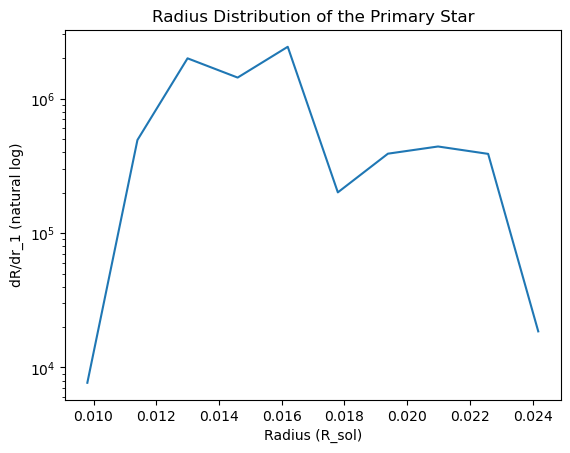

In [55]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(1)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_1 (natural log)")
plt.title("Radius Distribution of the Primary Star")

Text(0.5, 1.0, 'Radius Distribution of the Secondary Star')

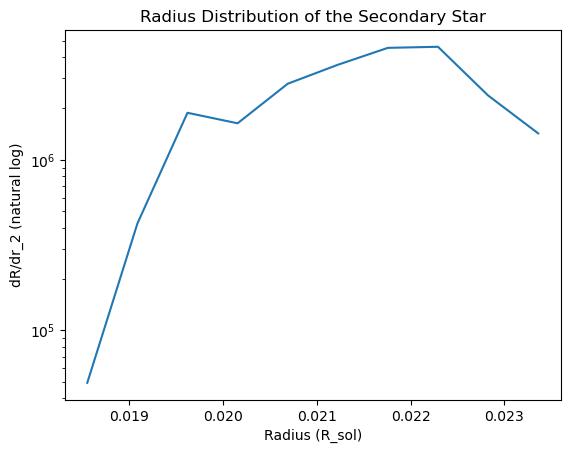

In [56]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(2)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_2 (natural log)")
plt.title("Radius Distribution of the Secondary Star")

#### Delay Time Distribution

In [ ]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(WDWD_SYS_LG['Time'])
t_col_lg = np.array(WDWD_SYS_LG['Coalescence_Time'])

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(WDWD_SYS_LG.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)


In [165]:
Data_rates.close()
Data_weights.close()